In [15]:
library(reshape2)
library(rsdmx)
library(tidyr)

output <- "../output_mo_qt/"

,TIME_PERIOD,REF_AREA,MEASURE,obsValue
,<chr>,<chr>,<chr>,<dbl>
1,2014-10,NLD,CCICP,100.28420
2,2014-11,NLD,CCICP,100.25470
3,2008-07,NLD,CCICP,98.87919
4,2022-12,NLD,CCICP,97.23165
5,2023-01,NLD,CCICP,97.70004
6,2024-10,NLD,CCICP,99.57467


TIME_PERIOD,CCICP_NLD_CLI,BCICP_NLD_CLI
<date>,<dbl>,<dbl>
2024-05-01,99.35704,100.2616
2024-06-01,99.36520,100.3004
2024-07-01,99.45082,100.2987
2024-08-01,99.56591,100.2908
2024-09-01,99.64722,100.2278
2024-10-01,99.57467,100.1117


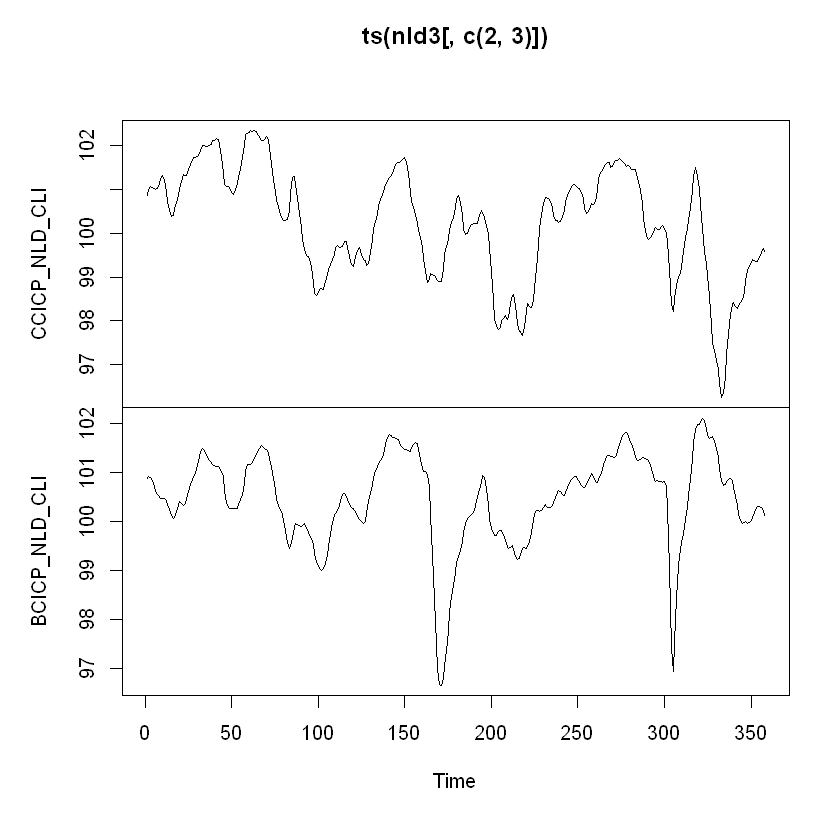

In [16]:
myUrl <- "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_CLI,4.1/NLD.M.LOCOS3+LOCOPC+CCICP+BCICP......H?startPeriod=1995-01&dimensionAtObservation=AllDimensions"

dataset <- readSDMX(myUrl)
stats <- as.data.frame(dataset)


#write.csv(stats,"output/LeadingIndicators_NLD_m0.csv", row.names = FALSE)

#stats[order(stats$TIME_PERIOD),]
nld1 <- stats[c("TIME_PERIOD", "REF_AREA", "MEASURE","obsValue")]

head(nld1)

nld2 <- pivot_wider(nld1, names_from=MEASURE, values_from=obsValue)

nld2$TIME_PERIOD <- as.Date(paste0(nld2$TIME_PERIOD, "-01"), format = "%Y-%m-%d")

nld3 <- nld2[order(nld2$TIME_PERIOD),]
nld3$REF_AREA <- NULL

names(nld3)[c(2,3)] <- paste0(names(nld3)[c(2,3)], "_NLD_CLI")
tail(nld3)
plot(ts(nld3[,c(2,3)]))

TIME_PERIOD,CCICP_DEU,BCICP_DEU
<date>,<dbl>,<dbl>
2024-05-01,99.67835,98.79533
2024-06-01,99.79649,98.76119
2024-07-01,99.84816,98.63773
2024-08-01,99.75276,98.45783
2024-09-01,99.68155,98.25905
2024-10-01,99.73027,98.08765


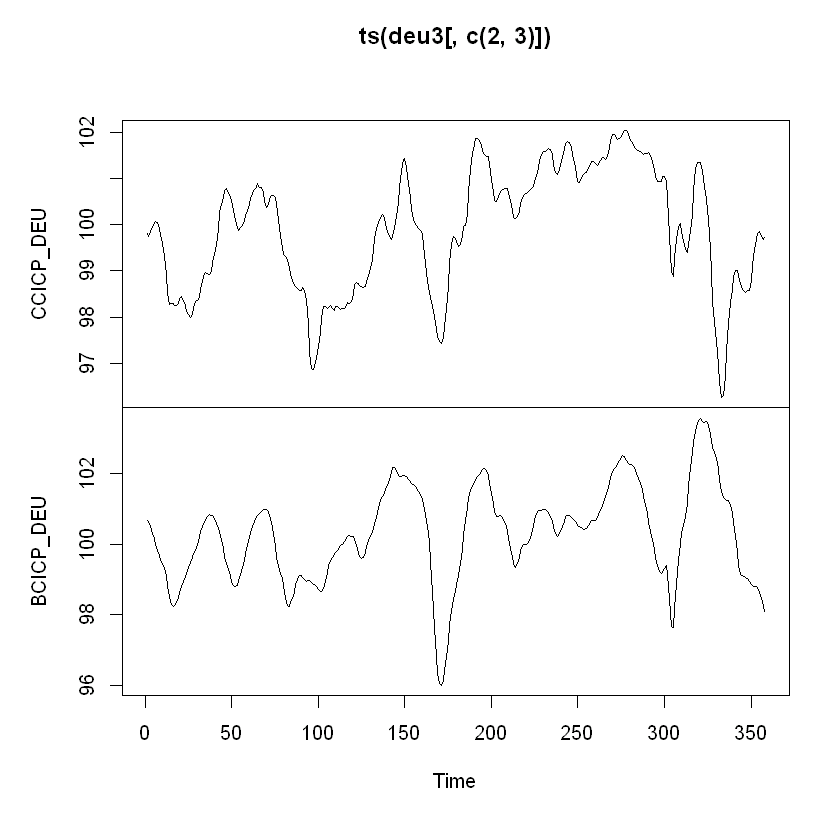

In [17]:
myUrl <- "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_CLI,4.1/DEU.M.LOCOS3+LOCOPC+CCICP+BCICP......H?startPeriod=1995-01&dimensionAtObservation=AllDimensions"

dataset <- readSDMX(myUrl)
stats <- as.data.frame(dataset)
#stats[order(stats$TIME_PERIOD),]
deu1 <- stats[c("TIME_PERIOD", "REF_AREA", "MEASURE","obsValue")]

deu2 <- pivot_wider(deu1, names_from=MEASURE, values_from=obsValue)
deu2$LOCOS3 <- NULL


deu2$TIME_PERIOD <- as.Date(paste0(deu2$TIME_PERIOD, "-01"), format = "%Y-%m-%d")

deu3 <- deu2[order(deu2$TIME_PERIOD),]
deu3$REF_AREA <- NULL

names(deu3)[c(2,3)] <- paste0(names(deu3)[c(2,3)], "_DEU")
tail(deu3)
plot(ts(deu3[,c(2,3)]))

In [18]:
oecd_confidence <- merge(x = nld3, y = deu3, by = "TIME_PERIOD", all = TRUE)
write.csv(oecd_confidence, paste0(output, "OECD_Confidence_mo.csv"), row.names = FALSE)